In [32]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
from scipy.misc import derivative
import time

In [33]:
data= pd.read_csv("Gauss1_Data.txt",names=['y','x'], sep=" ")

data

,y,x
NaN,97.622270,1.0
NaN,97.807240,2.0
NaN,96.622470,3.0
NaN,92.590220,4.0
NaN,91.238690,5.0
...,...,...
NaN,8.362329,246.0
NaN,8.983658,247.0
NaN,3.362571,248.0
NaN,1.182746,249.0


In [34]:
y = torch.from_numpy(data['y'].to_numpy(np.float64))
x = torch.from_numpy(data['x'].to_numpy(np.float64))

# b = torch.tensor([10.0,-1.0,0.05,-0.00001,-0.05,0.001,-0.000001],requires_grad=True)
b = torch.tensor([97.0,0.009,100.0,65.0,20.0,70.0,178.0,16.5],requires_grad=True)


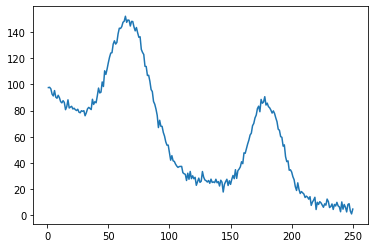

In [35]:
plt.plot(x.numpy(),y.numpy())

In [36]:
## Numerical Differentiation

b = np.array([97.0,0.009,100.0,65.0,20.0,70.0,178.0,16.5]).reshape(-1,1)

x=x.detach().numpy()

u=0.1 #beta multiply identity matrix
beta = 10
V_prev = 0
    

def f0(b0):
    return  b0*np.exp(-b[1]*x) + b[2]*np.exp(-np.power((x-b[3]),2)/np.power(b[4],2)) + b[5]*np.exp(-np.power((x-b[6]),2)/np.power(b[7],2))-y.detach().numpy()  
def f1(b1):
    return  b[0]*np.exp(-b1*x) + b[2]*np.exp(-np.power((x-b[3]),2)/np.power(b[4],2)) + b[5]*np.exp(-np.power((x-b[6]),2)/np.power(b[7],2))-y.detach().numpy()   
def f2(b2):
    return b[0]*np.exp(-b[1]*x) + b2*np.exp(-np.power((x-b[3]),2)/np.power(b[4],2)) + b[5]*np.exp(-np.power((x-b[6]),2)/np.power(b[7],2))-y.detach().numpy() 
def f3(b3):
    return  b[0]*np.exp(-b[1]*x) + b[2]*np.exp(-np.power((x-b3),2)/np.power(b[4],2)) + b[5]*np.exp(-np.power((x-b[6]),2)/np.power(b[7],2))-y.detach().numpy()  
def f4(b4):
    return  b[0]*np.exp(-b[1]*x) + b[2]*np.exp(-np.power((x-b[3]),2)/np.power(b4,2)) + b[5]*np.exp(-np.power((x-b[6]),2)/np.power(b[7],2))-y.detach().numpy()   
def f5(b5):
    return  b[0]*np.exp(-b[1]*x) + b[2]*np.exp(-np.power((x-b[3]),2)/np.power(b[4],2)) + b5*np.exp(-np.power((x-b[6]),2)/np.power(b[7],2))-y.detach().numpy() 
def f6(b6):
    return   b[0]*np.exp(-b[1]*x) + b[2]*np.exp(-np.power((x-b[3]),2)/np.power(b[4],2)) + b[5]*np.exp(-np.power((x-b6),2)/np.power(b[7],2))-y.detach().numpy()  
def f7(b7):
    return   b[0]*np.exp(-b[1]*x) + b[2]*np.exp(-np.power((x-b[3]),2)/np.power(b[4],2)) + b[5]*np.exp(-np.power((x-b[6]),2)/np.power(b7,2))-y.detach().numpy()  


start_time = time.perf_counter()   
    
for c in range(500):

    y_pred = b[0]*np.exp(-b[1]*x) + b[2]*np.exp(-np.power((x-b[3]),2)/np.power(b[4],2)) + b[5]*np.exp(-np.power((x-b[6]),2)/np.power(b[7],2))
    error = (y_pred - y.detach().numpy()).reshape(-1,1)
    
    d_b0 = derivative(f0,b[0] , dx=1e-6)
    d_b1 = derivative(f1,b[1] , dx=1e-6)
    d_b2 = derivative(f2,b[2] , dx=1e-6)
    d_b3 = derivative(f3,b[3] , dx=1e-6)
    d_b4 = derivative(f4,b[4] , dx=1e-6)
    d_b5 = derivative(f5,b[5] , dx=1e-6)
    d_b6 = derivative(f6,b[6] , dx=1e-6)
    d_b7 = derivative(f7,b[7] , dx=1e-6)
     
    jacobian = np.transpose(np.array([d_b0,d_b1,d_b2,d_b3,d_b4,d_b5,d_b6,d_b7]))
    dParam = np.matmul(np.matmul(np.linalg.inv((np.matmul(np.transpose(jacobian),jacobian)+u*np.identity(len(b)))),np.transpose(jacobian)),error)
    b -= dParam
    V = np.sum(np.square(error))
    if(V > V_prev):
            u *= beta
    else:
            u /= beta
    V_prev = V
    print("c: ",c," error: ",V," B:", b)
    
    if V <  1.31582224321E+03:
        break
print("time taken to execute: ",time.perf_counter()-start_time)  
print("SD error is", np.std(np.square(error)))

c:  0  error:  7371.720578441942  B: [[9.83712989e+01]
 [1.01435353e-02]
 [9.78875848e+01]
 [6.72216586e+01]
 [2.30980838e+01]
 [7.10615324e+01]
 [1.78978024e+02]
 [1.82682567e+01]]
c:  1  error:  1473.813323298307  B: [[9.87671430e+01]
 [1.04779141e-02]
 [1.00316276e+02]
 [6.74859761e+01]
 [2.31377944e+01]
 [7.19204317e+01]
 [1.78999580e+02]
 [1.83899390e+01]]
c:  2  error:  1316.4324176401662  B: [[9.87789168e+01]
 [1.04974561e-02]
 [1.00489190e+02]
 [6.74811875e+01]
 [2.31299779e+01]
 [7.19943296e+01]
 [1.78998044e+02]
 [1.83896468e+01]]
c:  3  error:  1315.8222792616948  B: [[9.87782056e+01]
 [1.04972741e-02]
 [1.00489901e+02]
 [6.74811115e+01]
 [2.31297723e+01]
 [7.19944983e+01]
 [1.78998051e+02]
 [1.83893873e+01]]
c:  4  error:  1315.822243206519  B: [[9.87782110e+01]
 [1.04972766e-02]
 [1.00489906e+02]
 [6.74811113e+01]
 [2.31297734e+01]
 [7.19945031e+01]
 [1.78998050e+02]
 [1.83893891e+01]]
time taken to execute:  0.01804119999997056
SD error is 7.700813572120039


In [37]:
def Jacobian(loss,params,numParams):
    
    jacobian = torch.empty(len(loss), numParams) 
    
    for i in range(len(loss)):
        
        loss[i].backward(retain_graph=True)
        
        for n in range(numParams):
            jacobian[i][n] = params.grad[n]
        params.grad.zero_()      
    return jacobian    

In [38]:
## Automatic Differentiation
num_param = len(b)
u=0.1 #beta multiply identity matrix
beta = 10
error_prev = 0
start_time = time.perf_counter()
for c in range(200):

    y_pred = b[0]*torch.exp(-b[1]*x) + b[2]*torch.exp(-torch.pow((x-b[3]),2)/torch.pow(b[4],2)) + b[5]*torch.exp(-torch.pow((x-b[6]),2)/torch.pow(b[7],2))
    
    loss = y_pred-y
    error = torch.sum(torch.square(loss)) #residual sum of squares
    print("",c," error is: ",error.detach().numpy()," b is ", b.detach().numpy())
    jacobian = Jacobian(loss,b,len(b))

    dParam = torch.matmul(torch.matmul(torch.inverse(torch.matmul(torch.transpose(jacobian,-1,0),jacobian)+u*torch.eye(num_param, num_param)),torch.transpose(jacobian,-1,0)),loss.float())
    with torch.no_grad():
        b -=dParam
    
        if(error > error_prev):
            u *= beta
        else:
            u /= beta
        error_prev = error
    if error< 1.31582224321E+03 :#7.88539786689E+02:  given residual sum of squares
        break
print("time taken to execute: ",time.perf_counter()-start_time) 
print("SD error is", np.std(np.square(loss.detach().numpy())))

TypeError: exp(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [ ]:
plt.plot(y_pred.detach(),'g', y,'r')